# EUKARYA

In [34]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### ALPHA & BETA DIVERSITY
1. make a MAFFT tree
2. alpha rarefaction
3. alpha diversity
4. beta diversity

In [35]:
#import packages
import os
import dokdo
import qiime2 as q2
import seaborn as sns
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt
from qiime2.plugins import phylogeny
from qiime2.plugins import diversity
from skbio import DistanceMatrix
import qiime2.plugins.phylogeny.actions as phylogeny_actions
from qiime2.plugins import feature_table

In [36]:
# import data
denoisetable_eu = q2.Artifact.load('./results/denoisetable_eu.qza')
rep_seqs_eu = q2.Artifact.load('./results/rep_seqs_eu.qza')
denoising_stats = q2.Artifact.load('./results/denoising_stats.qza')
sample_metadata = q2.Metadata.load('../00.sample-metadata.tsv')

## TREE

In [37]:
action_results = phylogeny_actions.align_to_tree_mafft_fasttree(
    sequences=rep_seqs_eu,
)
aligned_rep_seqs = action_results.alignment
masked_aligned_rep_seqs = action_results.masked_alignment
unrooted_tree = action_results.tree
rooted_tree = action_results.rooted_tree

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: mafft --preservecase --inputorder --thread 1 /tmp/qiime2-archive-vgrdnjfy/4bac6403-48df-4237-97c1-c16311ce66c8/data/dna-sequences.fasta



inputfile = orig
578 x 260 - 260 d
nthread = 1
nthreadpair = 1
nthreadtb = 1
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
  501 / 578 (thread    0)
done.

Constructing a UPGMA tree (efffree=0) ... 
  570 / 578
done.

Progressive alignment 1/2... 
STEP    63 / 577 (thread    0)
Reallocating..done. *alloclen = 1521
STEP   501 / 577 (thread    0) h
done.

Making a distance matrix from msa.. 
  500 / 578 (thread    0)
done.

Constructing a UPGMA tree (efffree=1) ... 
  570 / 578
done.

Progressive alignment 2/2... 
STEP   470 / 577 (thread    0) h
Reallocating..done. *alloclen = 1521
STEP   501 / 577 (thread    0) h
done.

disttbfast (nuc) Version 7.505
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
1 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --aut

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: FastTree -quote -nt /tmp/qiime2-archive-zomxbpc4/469e1455-fe43-4a49-8b72-91c26149ed89/data/aligned-dna-sequences.fasta



FastTree Version 2.1.10 Double precision (No SSE3)
Alignment: /tmp/qiime2-archive-zomxbpc4/469e1455-fe43-4a49-8b72-91c26149ed89/data/aligned-dna-sequences.fasta
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
      0.11 seconds: Joined    100 of    575
      0.23 seconds: Joined    400 of    575
Initial topology in 0.30 seconds
Refining topology: 37 rounds ME-NNIs, 2 rounds ME-SPRs, 18 rounds ML-NNIs
      0.33 seconds: ME NNI round 3 of 37, 1 of 576 splits
      0.46 seconds: SPR round   1 of   2, 201 of 1154 nodes
      0.57 seconds: SPR round   1 of   2, 401 of 1154 nodes
      0.68 seconds: SPR round   1 of   2, 601 of 1154 nodes
      0.79 seconds: SPR round   1 of   2, 801 of 1154 nodes
      0.90 seconds: SPR round   1 of   2, 1001 of 1154 nodes
      1.01 seconds: ME NNI round 14

## ALPHA AND BETA DIVERSITY

In [38]:
# summarise and visualise
feature_table.visualizers.summarize(
    table = denoisetable_eu,
    sample_metadata = sample_metadata
).visualization

<visualization: Visualization uuid: 0d6a63b3-54f2-4aee-9b3c-ee40e646769a>

In [39]:
# # choose a round number in the 3rd quartile frequency per sample from the feature table visual summary
# # this step can take some time
# alpha_rarefaction_all = diversity.actions.alpha_rarefaction(
#     table = denoisetable_eu,
#     max_depth = 30000,
#     phylogeny = rooted_tree,
#     metrics = {'observed_features'},
#     metadata = sample_metadata,
#     steps = 1000
# )

In [40]:
# save alpha_rarefacion
# alpha_rarefaction_all.visualization.save('./results/alpha_rarefaction_30000.qzv')
qzv_file_alpha = q2.Visualization.load('./results/alpha_rarefaction_30000.qzv')

In [41]:
# sns.set()
# ax = dokdo.alpha_rarefaction_plot(qzv_file_alpha,
#                                   figsize=(9, 6),
#                                   metric='observed_features')
# 
# ax.set_xlabel('Globina sekvenciranja')
# ax.set_ylabel('Število ASV')
# 
# ax.legend(ncol=5)
# plt.tight_layout()
# plt.savefig('./results/eu_alpha_rarefaction_plot.png')

### ALPHA DIVERSITY

In [42]:
from qiime2.plugins.taxa.methods import filter_seqs, filter_table
taxonomy = q2.Artifact.load('./results/taxonomy_sklearn.qza')
# fiter denoisetable_eu, remove Vertebrata

denoisetable_eu_filtered = filter_table(
    table = denoisetable_eu,
    taxonomy = taxonomy, 
    exclude = 'p__Vertebrata'
)

In [43]:
# summarise and visualise
feature_table.visualizers.summarize(
    table = denoisetable_eu_filtered.filtered_table,
    sample_metadata = sample_metadata
).visualization

<visualization: Visualization uuid: 3f7d6b2c-4923-4539-9654-1c27a479cb92>

In [44]:
# # choose a round number in the 3rd quartile frequency per sample from the feature table visual summary
# # this step can take some time
# alpha_rarefaction_fil = diversity.actions.alpha_rarefaction(
#     table = denoisetable_eu_filtered.filtered_table,
#     max_depth = 3000,
#     phylogeny = rooted_tree,
#     metrics = {'observed_features'},
#     metadata = sample_metadata,
#     steps = 25
# )

# alpha_rarefaction_fil.visualization.save('./results/alpha_rarefaction_fil1.qzv')

In [45]:
qzv_file_alpha_fil1 = q2.Visualization.load('./results/alpha_rarefaction_fil1.qzv')

In [46]:
# sns.set()
# ax = dokdo.alpha_rarefaction_plot(qzv_file_alpha_fil1,
#                                   figsize=(9, 6),
#                                   metric='observed_features')
# ax.legend(ncol=5)
# plt.tight_layout()
# 
# ax.set_xlabel('Globina sekvenciranja')
# ax.set_ylabel('Število ASV')
# 
# plt.savefig('./results/eu_alpha_rarefaction_plot_fil1.png')

In [47]:
# set sampling_depth based on alpha rarefacation curve
depth = 643
action_results = diversity.actions.core_metrics_phylogenetic(
    table = denoisetable_eu_filtered.filtered_table,
    phylogeny = rooted_tree,
    sampling_depth = depth,
    metadata = sample_metadata
)

/home/npajek/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/diversity/alpha/_base.py:793: RuntimeWarning: invalid value encountered in double_scalars
/home/npajek/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-4rfz8woi/1ecac465-1526-40e6-917f-5c8437c205cc/data/feature-table.biom -t /tmp/qiime2-archive-a9csc85c/be1985f5-ccf5-4118-8263-ea83459e35b0/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-8gg0ob9g

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-4rfz8woi/1ecac465-1526-40e6-917f-5c8437c205cc/data/feature-table.biom -t /tmp/qiime2-archive-a9csc85c/be1985f5-ccf5-4118-8263-ea83459e35b0/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-w6ju6v8y

Running external command line application. This may print messages to stdout and/

/home/npajek/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -5.7574933972226674e-05 and the largest is 1.848468250447114.


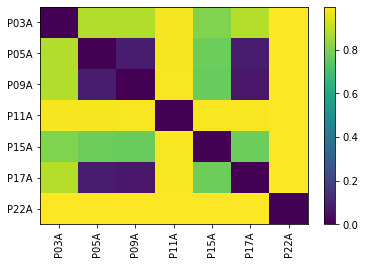

In [48]:
action_results.bray_curtis_distance_matrix.view(view_type=DistanceMatrix)

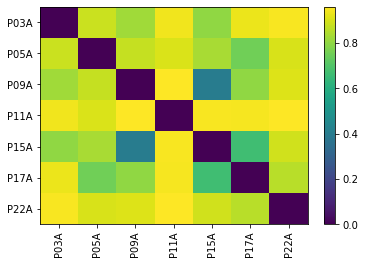

In [49]:
action_results.jaccard_distance_matrix.view(view_type=DistanceMatrix)

In [50]:
action_results.jaccard_emperor

<visualization: Visualization uuid: 50b8f56b-a36f-4f24-bc5a-56716954ad73>

In [51]:
# alpha_rarefaction = diversity.visualizers.alpha_rarefaction(
#     table = denoisetable_eu_filtered.filtered_table,
#     phylogeny = rooted_tree,
#     max_depth = depth,
#     metadata = sample_metadata,
#     metrics = {'chao1', 'simpson', 'simpson_e', 'observed_features', 'dominance'},
#     steps =  100
# )
# alpha_rarefaction.visualization.save('./results/alpha_diversity_new.qzv')

In [52]:
# load alpha_rarefacion
alpha_rar = q2.Visualization.load('./results/alpha_diversity_new.qzv')
alpha_rar

<visualization: Visualization uuid: 19323e7f-c280-497a-9ca2-8c0381d2edfc>

In [53]:
metrics = ['chao1', 'simpson', 'simpson_e', 'observed_features', 'dominance']

# alpha diversity metrics and significance

# init empty list
df_list = []
artifacts = {}

# loop over metrics
for metric in metrics:
    result = diversity.actions.alpha(
        table = action_results.rarefied_table,
        metric = metric
    )  # save to result
    artifact = result.alpha_diversity  # extract artifact
    artifacts[metric] = artifact
    df_list.append(artifact.view(view_type=q2.Metadata).to_dataframe())  # convert to DF and add to list
    
df = pd.concat(df_list, axis=1)  # merge list of dataframes, add each DF as new column (instead of new row (default))
df

,chao1,simpson,simpson_e,observed_features,dominance
Sample ID,,,,,
P03A,15.0,0.802232,0.337095,15.0,0.197768
P05A,4.0,0.149416,0.293916,4.0,0.850584
P09A,5.0,0.113286,0.225552,5.0,0.886714
P11A,19.0,0.884786,0.456817,19.0,0.115214
P15A,3.0,0.362221,0.522647,3.0,0.637779
P17A,1.0,0.000000,1.000000,1.0,1.000000
P22A,7.0,0.541944,0.311877,7.0,0.458056


In [54]:
ndf = df.merge(sample_metadata.to_dataframe(), left_index=True, right_index=True)
# ndf["color"] = ndf.groupby("population").ngroup()
# ndf.reset_index().plot.scatter("index", "observed_features", c="color", cmap=plt.cm.viridis)

In [55]:
col = 'observed_features'
meta_cols = ['year', 'population']
df1 = ndf[meta_cols + [col]].rename(columns={col: 'value'}).eval('type="Število ASV"')

col = 'chao1'
df2 = ndf[meta_cols + [col]].rename(columns={col: 'value'}).eval('type="Chao1"')

df = pd.concat([df1, df2])

In [56]:
df = df.rename(columns={'population': 'Filogenetska linija', 'year': 'Leto', 'value': 'Število ASV', 'type': 'Metrika'})
df.index.name = 'Osebek'

/home/npajek/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/npajek/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./results/eukarya_obs-feat_chao1.png


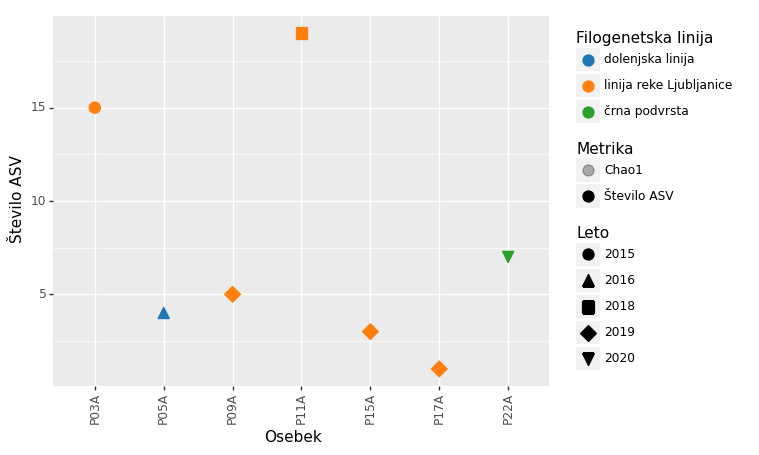

<ggplot: (8752300954438)>

In [57]:
from plotnine import *
from plotnine.data import *

p = (
    ggplot(df, aes(x=df.index, y='Število ASV', shape='Leto', color='Filogenetska linija', alpha='Metrika'))
    + geom_point(size=4)
    + labs(x='Osebek', y='Število ASV')
    + scale_color_manual(['C0', 'C1', 'C2'])
    + scale_alpha_manual([0.3, 1.0])
    + theme(axis_text_x=element_text(rotation=90))
)

p.save('./results/eukarya_obs-feat_chao1.png')

p

In [58]:
# shannon = (
#     ggplot(ndf, aes(x=ndf.index, y='shannon_entropy', shape='year', color='population'))
#     + geom_point(size=4)
#     + labs(x='Sample ID', y='shannon_entropy')
#     + scale_color_manual(['C0', 'C1', 'C2'])
# )

# shannon.save('./results/eukarya_shannon.png')
# shannon

In [59]:
ndf

,chao1,simpson,simpson_e,observed_features,dominance,sample,location,origin,year,parkelj,specimen,population
P03A,15.0,0.802232,0.337095,15.0,0.197768,P03A,Planinska_jama,Paa201_t0,2015,no,Paa201,linija reke Ljubljanice
P05A,4.0,0.149416,0.293916,4.0,0.850584,P05A,Stobe,Paa204_t10d,2016,no,Paa204,dolenjska linija
P09A,5.0,0.113286,0.225552,5.0,0.886714,P09A,Planinska_jama,Paa210_t0,2019,no,Paa210,linija reke Ljubljanice
P11A,19.0,0.884786,0.456817,19.0,0.115214,P11A,Planinska_jama,Paa211_t0,2018,no,Paa211,linija reke Ljubljanice
P15A,3.0,0.362221,0.522647,3.0,0.637779,P15A,Planinska_jama,Paa220_t0,2019,no,Paa220,linija reke Ljubljanice
P17A,1.0,0.000000,1.000000,1.0,1.000000,P17A,Planinska_jama,Paa221_t0,2019,no,Paa221,linija reke Ljubljanice
P22A,7.0,0.541944,0.311877,7.0,0.458056,P22A,Obrsec,PAP20_parkelj,2020,yes,PAP20,črna podvrsta


In [60]:
ndf = ndf.rename(columns={'population': 'Filogenetska linija', 'year': 'Leto'})
ndf.index.name = 'Osebek'
ndf

,chao1,simpson,simpson_e,observed_features,dominance,sample,location,origin,Leto,parkelj,specimen,Filogenetska linija
Osebek,,,,,,,,,,,,
P03A,15.0,0.802232,0.337095,15.0,0.197768,P03A,Planinska_jama,Paa201_t0,2015,no,Paa201,linija reke Ljubljanice
P05A,4.0,0.149416,0.293916,4.0,0.850584,P05A,Stobe,Paa204_t10d,2016,no,Paa204,dolenjska linija
P09A,5.0,0.113286,0.225552,5.0,0.886714,P09A,Planinska_jama,Paa210_t0,2019,no,Paa210,linija reke Ljubljanice
P11A,19.0,0.884786,0.456817,19.0,0.115214,P11A,Planinska_jama,Paa211_t0,2018,no,Paa211,linija reke Ljubljanice
P15A,3.0,0.362221,0.522647,3.0,0.637779,P15A,Planinska_jama,Paa220_t0,2019,no,Paa220,linija reke Ljubljanice
P17A,1.0,0.000000,1.000000,1.0,1.000000,P17A,Planinska_jama,Paa221_t0,2019,no,Paa221,linija reke Ljubljanice
P22A,7.0,0.541944,0.311877,7.0,0.458056,P22A,Obrsec,PAP20_parkelj,2020,yes,PAP20,črna podvrsta


/home/npajek/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/npajek/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./results/eukarya_simpson_e.png


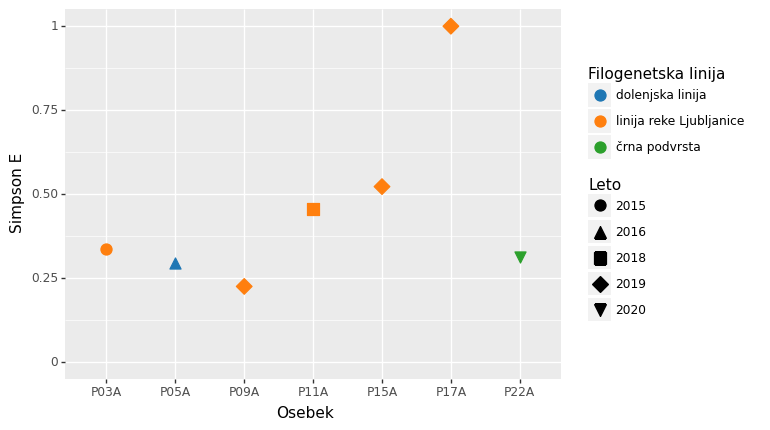

<ggplot: (8752300854489)>

In [61]:
simpson = (
    ggplot(ndf, aes(x=ndf.index, y='simpson_e', shape='Leto', color='Filogenetska linija'))
    + geom_point(size=4)
    + labs(x='Osebek', y='Simpson E')
    + scale_color_manual(['C0', 'C1', 'C2'])
    + ylim(0,1)
)


simpson.save('./results/eukarya_simpson_e.png')
simpson 

In [62]:
# visualisations of alpha diversity metrics
visualizations = {}

for key, value in artifacts.items():
    visualizations[key] = diversity.visualizers.alpha_group_significance(
        alpha_diversity = value,
        metadata = sample_metadata
    ).visualization

In [63]:
# # simpson viz
# visualizations['simpson']

# # observed_features viz
# visualizations['observed_features']

# # fisher_alpha viz
# visualizations['fisher_alpha']

# # chao1 viz
# visualizations['chao1']

# # shannon viz
# visualizations['shannon']

# # evenness_vector viz
# diversity.visualizers.alpha_group_significance(
#     alpha_diversity = action_results.evenness_vector,
#     metadata = sample_metadata
# ).visualization

# # faith_pd viz
# diversity.visualizers.alpha_group_significance(
#     alpha_diversity = action_results.faith_pd_vector,
#     metadata = sample_metadata
# ).visualization

### BETA DIVERSITY

In [64]:
denoisetable_subset_population = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_eu_filtered.filtered_table,
    metadata = sample_metadata,
    where = "[population] IN ('Linija reke Ljubljanice', 'Črna podvrsta')"
)

In [65]:
# 2016 falls out
denoisetable_subset_year = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_eu_filtered.filtered_table,
    metadata = sample_metadata,
    where = "[year] IN ('2015','2019')"
)

In [66]:
# determine depth/s from alpha_rarefaction
# determine conditions from metadata column names
depth = 643
condition = 'population'

core_metrics_results_subset_population = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_population.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

ValueError: The rarefied table contains no samples or features. Verify your table is valid and that you provided a shallow enough sampling depth.

In [ ]:
condition = 'year'

core_metrics_results_subset_year = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_year.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

#### PERMANOVA

In [ ]:
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "permanova",
    pairwise = True
)
permanova_population.visualization

In [ ]:
# PERMANOVA year
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "permanova",
    pairwise = True
)
permanova_year.visualization

#### ANOSIM

In [ ]:
anosim_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "anosim",
    pairwise = True
)
anosim_population.visualization

In [ ]:
# anosim year

anosim_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "anosim",
    pairwise = True
)
anosim_year.visualization